# NCT-CRC-HE-100K image classification


The NCT-CRC-HE-100K dataset is a set of 100,000 non-overlapping image patches extracted from 86 HE stained human cancer tissue slides and normal tissue from the NCT biobank (National Center for Tumor Diseases) and the UMM pathology archive (University Medical Center Mannheim).

### 1 IMPORT AND PREPROCESS THE DATA
#### 1.1 Libraries required

In [ ]:
!pip install opencv-python
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns

!pip install split-folders
import splitfolders

#### 1.2 Import and preprocess the data

We first need to create a train (70%) and a validation (30%) folder inside the general folder we have. For that we use split-folders.

In [ ]:
splitfolders.ratio("C:\\Users\\HelenaVillaresSantia\\Downloads\\NCT-CRC-HE-100K", output="crc100k",seed=1337, ratio=(.7, .3), group_prefix=None, move=False)

Copying files: 100000 files [28:08, 59.24 files/s]


In [ ]:
print(os.listdir("C:/Users/HelenaVillaresSantia/crc100k/"))

#SIZE = 128 
SIZE=20

['train', 'val']


#### 1.3 Data distribution
Run until the reassignment of the split data names to the meaningful convention before running this cell.

C:\Users\HelenaVillaresSantia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HelenaVillaresSantia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


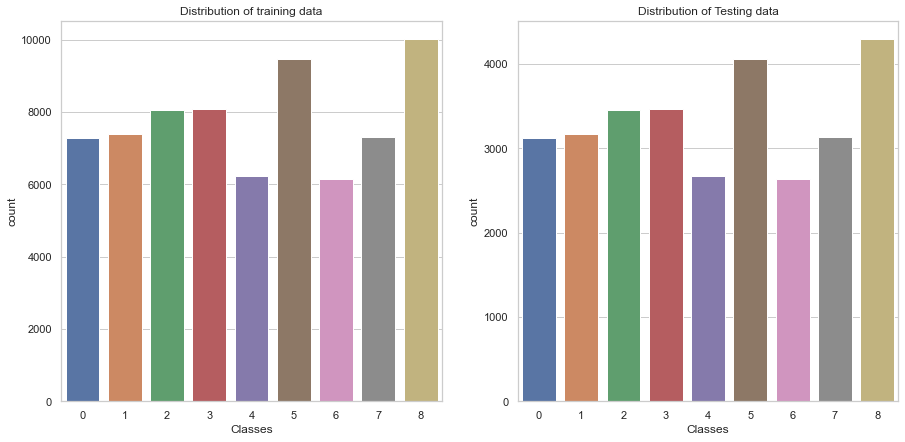

In [ ]:
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(1,2,figsize=(15,7)) 

sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

### 1.4 Images to Arrays
#### Train Array 

In [ ]:
train_images = []
train_labels = [] 
for directory_path in glob.glob(r"C:\Users\HelenaVillaresSantia\crc100k\train\*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.tif")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img) # append img to the empty list opened before
        train_labels.append(label)# for which img it says which the correspondent label is
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)


ADI
C:\Users\HelenaVillaresSantia\crc100k\train\ADI\ADI-AAAMHQMK.tif
C:\Users\HelenaVillaresSantia\crc100k\train\ADI\ADI-AAEKWPVP.tif
C:\Users\HelenaVillaresSantia\crc100k\train\ADI\ADI-AAGDEQEK.tif
C:\Users\HelenaVillaresSantia\crc100k\train\ADI\ADI-AAGQKKEG.tif
C:\Users\HelenaVillaresSantia\crc100k\train\ADI\ADI-AAGSEPQK.tif
C:\Users\HelenaVillaresSantia\crc100k\train\ADI\ADI-AAHTSYCW.tif
C:\Users\HelenaVillaresSantia\crc100k\train\ADI\ADI-AAIRWEHA.tif
C:\Users\HelenaVillaresSantia\crc100k\train\ADI\ADI-AAKARNMS.tif
C:\Users\HelenaVillaresSantia\crc100k\train\ADI\ADI-AAKECYFG.tif
C:\Users\HelenaVillaresSantia\crc100k\train\ADI\ADI-AAKMYPEI.tif
C:\Users\HelenaVillaresSantia\crc100k\train\ADI\ADI-AAKNYETA.tif
C:\Users\HelenaVillaresSantia\crc100k\train\ADI\ADI-AAKPCSCF.tif
C:\Users\HelenaVillaresSantia\crc100k\train\ADI\ADI-AALISVWI.tif
C:\Users\HelenaVillaresSantia\crc100k\train\ADI\ADI-AALYMMMY.tif
C:\Users\HelenaVillaresSantia\crc100k\train\ADI\ADI-AANCAVPI.tif
C:\Users\HelenaVillar

#### Test Array 

In [ ]:
test_images = []
test_labels = [] 
for directory_path in glob.glob(r"C:\Users\HelenaVillaresSantia\crc100k\val\*"):
    fruit_label = directory_path.split("\\")[-1]
    print(fruit_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.tif")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

ADI
C:\Users\HelenaVillaresSantia\crc100k\val\ADI\ADI-AACCGLYD.tif
C:\Users\HelenaVillaresSantia\crc100k\val\ADI\ADI-AACVGRFT.tif
C:\Users\HelenaVillaresSantia\crc100k\val\ADI\ADI-AADGNDRG.tif
C:\Users\HelenaVillaresSantia\crc100k\val\ADI\ADI-AANTGCGD.tif
C:\Users\HelenaVillaresSantia\crc100k\val\ADI\ADI-AAQGWDFS.tif
C:\Users\HelenaVillaresSantia\crc100k\val\ADI\ADI-AASIWMCN.tif
C:\Users\HelenaVillaresSantia\crc100k\val\ADI\ADI-AAVCLGTW.tif
C:\Users\HelenaVillaresSantia\crc100k\val\ADI\ADI-AAVISFAG.tif
C:\Users\HelenaVillaresSantia\crc100k\val\ADI\ADI-ACEGAGDH.tif
C:\Users\HelenaVillaresSantia\crc100k\val\ADI\ADI-ACGPLPIS.tif
C:\Users\HelenaVillaresSantia\crc100k\val\ADI\ADI-ACIAFTIG.tif
C:\Users\HelenaVillaresSantia\crc100k\val\ADI\ADI-ACLCHVYP.tif
C:\Users\HelenaVillaresSantia\crc100k\val\ADI\ADI-ACLCVLRY.tif
C:\Users\HelenaVillaresSantia\crc100k\val\ADI\ADI-ACLGSTKK.tif
C:\Users\HelenaVillaresSantia\crc100k\val\ADI\ADI-ACQMLEIW.tif
C:\Users\HelenaVillaresSantia\crc100k\val\ADI\ADI-A

#### Change labels from text to integers

In [ ]:
#change labels from text to integers --> eg. ADI=0, BACK=1, DEB=2 ...
from sklearn import preprocessing
le = preprocessing.LabelEncoder() # we can encode and then decode (we'll do it at the end!)
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#### Reassign split data names the meaningful convention

In [ ]:
test_images = np.array(test_images)
train_images = np.array(train_images)

x_train, x_test, y_train, y_test = train_images, test_images, train_labels_encoded, test_labels_encoded

#### Rescale values from 0 to 1

In [ ]:
x_train, x_test = x_train / 255, x_test / 255

#### One Hot Encoding

Ref. https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [ ]:
#One hot encode y values for neural network.
#HOT ENCODING: for each value creates an entire column, just one pixel each row will have a value of 1 
from tensorflow.keras.utils import to_categorical
y_train_hot = to_categorical(y_train, 9)
y_test_hot = to_categorical(y_test, 9)

### 2 CONVOLUTIONAL NEURAL NETWORK
#### 2.1 Deep Learning

In [ ]:
activation = 'sigmoid'

model = Sequential()
model.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))#32 filters
model.add(BatchNormalization())

model.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))#32 filters
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))#64 filters
model.add(BatchNormalization())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))#64 filters
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())#DONT'T miss the flatten layer between CNN and Dense layers
#flatten=becomes one column, NOT multi-dimensional

Add layers for DL prediction: take the model and add the last dense layers.


In [ ]:
x = model.output  
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)#new x=dense applied on x
prediction_layer = Dense(9, activation = 'softmax')(x) # 9 classes!!!

Make a new model combining both feature extractor and x.

In [ ]:
cnn_model = Model(inputs=model.input, outputs=prediction_layer)
#cnn_model.compile(optimizer='rmsprop',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
cnn_model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary()) 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 20, 20, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 20, 20, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 20, 20, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0     

#### 2.2 Model train and validation data obtention

In [ ]:
history = cnn_model.fit(x_train, y_train_hot, epochs=50, validation_data = (x_test, y_test_hot))

Epoch 1/50
2188/2188 [==============================] - 433s 197ms/step - loss: 0.8346 - accuracy: 0.6844 - val_loss: 1.0366 - val_accuracy: 0.6301
Epoch 2/50
2188/2188 [==============================] - 413s 189ms/step - loss: 0.5391 - accuracy: 0.8015 - val_loss: 2.5275 - val_accuracy: 0.2888
Epoch 3/50
2188/2188 [==============================] - 375s 172ms/step - loss: 0.4059 - accuracy: 0.8542 - val_loss: 0.4886 - val_accuracy: 0.8230
Epoch 4/50
2188/2188 [==============================] - 395s 181ms/step - loss: 0.3338 - accuracy: 0.8805 - val_loss: 0.8326 - val_accuracy: 0.7178
Epoch 5/50
2188/2188 [==============================] - 427s 195ms/step - loss: 0.2896 - accuracy: 0.8982 - val_loss: 2.2261 - val_accuracy: 0.4834
Epoch 6/50
2188/2188 [==============================] - 437s 200ms/step - loss: 0.2635 - accuracy: 0.9059 - val_loss: 0.8967 - val_accuracy: 0.7138
Epoch 7/50
2188/2188 [==============================] - 499s 228ms/step - loss: 0.2397 - accuracy: 0.9152 - val_

### 2.3 Model Evaluation

#### Training and validation loss at each epoch

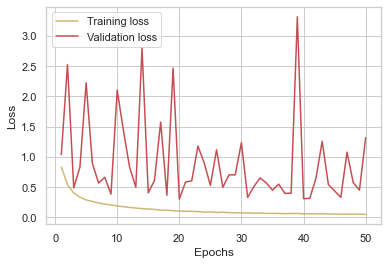

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
#plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Training and validation accuracy at each epoch

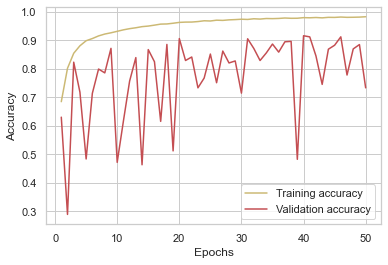

In [ ]:
#acc = history.history['acc']
#model.compile(loss="categorical_crossentropy", metrics=["acc"])
#val_acc = history.history['val_acc']
#model.compile(loss="categorical_crossentropy", metrics=["val_acc"])
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 2.4 Score trained model and prediction.

In [ ]:
# Score trained model.
scores = cnn_model.evaluate(x_test, y_test_hot, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

938/938 [==============================] - 50s 54ms/step - loss: 1.3184 - accuracy: 0.7330
Test loss: 1.3183948993682861
Test accuracy: 0.732960045337677


### 2.5 Confusion Matrix
Verify the accuracy of each class.

In [ ]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

[[2251  238  298    0   25  258   45    6    2]
 [   0 3102   14    0   47    5    0    2    0]
 [   0    2 2683    0    1  410   11  341    6]
 [   0    0  144 2203   45   51  929   46   50]
 [   0   32  186    0 1659  160  307  313   12]
 [   0    3  376    0    1 3486    0  194    1]
 [   1    0  220    3   30   51 2188   85   51]
 [   0    6  746    0    3  416   13 1924   26]
 [   0    0  457    0   21  325  666  331 2495]]


Text(66.5, 0.5, 'True label')

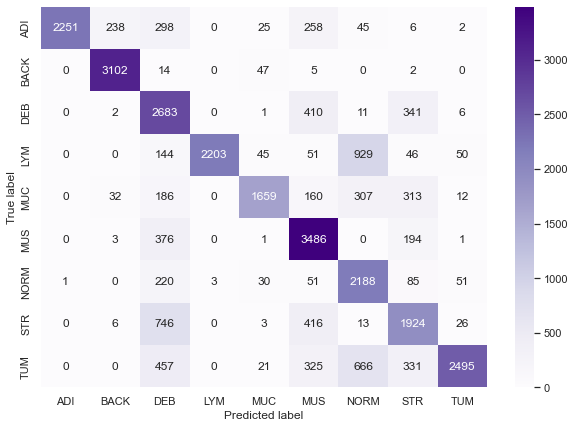

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
import pandas as pd
df_cm = pd.DataFrame(cm, index = ['ADI', 'BACK', 'DEB', 'LYM', 'MUC', 'MUS', 'NORM', 'STR', 'TUM'],
    columns = ['ADI', 'BACK', 'DEB', 'LYM', 'MUC', 'MUS', 'NORM', 'STR', 'TUM'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm,cmap='Purples',annot=True,fmt='d')#fmt to avoid scientific notation
plt.xlabel('Predicted label')
plt.ylabel('True label')

### 2.6 Check results on a few select images

The prediction for this image is:  ['STR']
The actual label for this image is:  STR


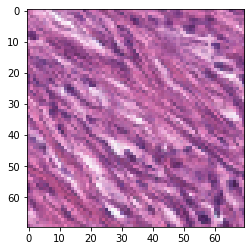

In [ ]:
n=1489  #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

### 3 RANDOM FOREST
#### 3.1 Model Training

In [ ]:
X_for_RF = model.predict(x_train) #This is out X input to RF

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)
# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=50, random_state=42)

Time taken to run the previous cell: about 6 min

#### 3.2 Model Validation

In [ ]:
#Send test data through same feature extractor process
X_test_feature = model.predict(x_test)
#Now predict using the trained RF model 
predRF = RF_model.predict(X_test_feature)
#Inverse le transform to get original label back
predRF = le.inverse_transform(predRF)

Time taken to run the previous cell: about 40"

In [ ]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predRF)) #Print overall accuracy

Accuracy =  0.8450821584508216


#### 3.3 Confusion Matrix
We use the heat map to verify accuracy of each class.

Text(69.0, 0.5, 'True label')

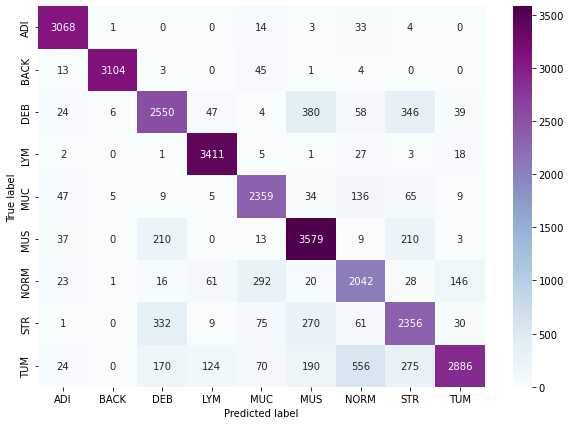

In [ ]:
cm = confusion_matrix(test_labels, predRF)
#print(cm)
df_cm = pd.DataFrame(cm, index = ['ADI', 'BACK', 'DEB', 'LYM', 'MUC', 'MUS', 'NORM', 'STR', 'TUM'],
    columns = ['ADI', 'BACK', 'DEB', 'LYM', 'MUC', 'MUS', 'NORM', 'STR', 'TUM'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm,cmap='BuPu', annot=True,fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')

#### 3.4 Check results on a few select images

The prediction for this image is:  ['MUS']
The actual label for this image is:  STR


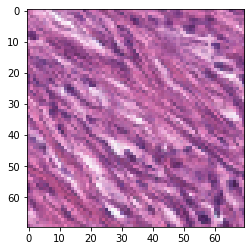

In [ ]:
n=1489 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=model.predict(input_img)
predRF = RF_model.predict(input_img_features)[0] 
predRF = le.inverse_transform([predRF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", predRF)
print("The actual label for this image is: ", test_labels[n])

### 4 K-NEAREST NEIGHBOUR
#### 4.1 Model Training
We use the same train data we used for both CNN and RF.

In [ ]:
X_for_KNN = model.predict(x_train)

We import kNN algorithm from sklearn.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

We train the model

In [ ]:
knn.fit(X_for_KNN, y_train)

KNeighborsClassifier()

### 4.2 Model Validation

In [ ]:
X_test_KNN = model.predict(x_test)
predKNN = knn.predict(X_test_KNN)
predKNN = le.inverse_transform(predKNN)

In [ ]:
from sklearn import metrics
print('KNN Accuracy = ',  metrics.accuracy_score(test_labels,predKNN))

KNN Accuracy =  0.11512182115121822


### 4.3 Confusion Matrix

<AxesSubplot:>

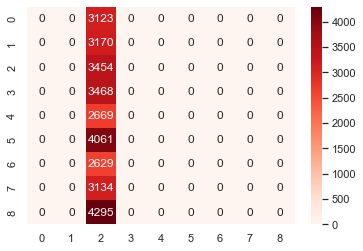

In [ ]:
cm = metrics.confusion_matrix(test_labels, predKNN)
#print(cm)
sns.heatmap(cm, annot=True,fmt='d',cmap='Reds')

#### 4.4 Check results on a few select images

In [ ]:
n=1489 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=model.predict(input_img)
predKNN = RF_model.predict(input_img_features)[0] 
predKNN = le.inverse_transform([predKNN])  #Reverse the label encoder to original name
print("The prediction for this image is: ", predKNN)
print("The actual label for this image is: ", test_labels[n])